In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from glob import glob
import numpy as np
from matplotlib.lines import Line2D
from matplotlib.axes import Axes 

In [46]:
demeter_fn = 'Spark/demeter_spark_comprehensive_stats_all_data.csv'
demeter_data = pd.read_csv(demeter_fn)
demeter_data = demeter_data[['data','#cores','run','demeter_log_runtime','demeter_log_cputime']]
demeter_data.columns=['data','#processors','run','elapsed','CPU_T']

demeter_data["CPU_T/Processor"] = demeter_data["CPU_T"].divide(demeter_data["#processors"])


demeter_data["CPU_T/Processor"] = demeter_data["CPU_T/Processor"] / 1000 ## ms to second
demeter_data['CPU_T'] = demeter_data['CPU_T']/1000 ## ms to second

demeter_data['non-CPU_T'] = demeter_data['elapsed'].multiply(demeter_data['#processors']) - demeter_data['CPU_T']
demeter_data["non-CPU_T/Processor"] = demeter_data['non-CPU_T'].divide(demeter_data["#processors"])

demeter_data['Platform'] = 'Demeter'

demeter_data = demeter_data[['data','#processors','run','elapsed','CPU_T',
                             'non-CPU_T','Platform', "CPU_T/Processor", "non-CPU_T/Processor"]]

demeter_data['CPU_T'] = np.log10(demeter_data['CPU_T']/60.0)
demeter_data['non-CPU_T'] = np.log10(demeter_data['non-CPU_T']/60.0)
demeter_data['elapsed'] = np.log10(demeter_data['elapsed']/60.0)
demeter_data['CPU_T/Processor'] = np.log10(demeter_data['CPU_T/Processor']/60.0)
demeter_data['non-CPU_T/Processor'] = np.log10(demeter_data['non-CPU_T/Processor']/60.0)

In [84]:
minerva_fn = 'final_results/minerva-all-usage.csv'
minerva_data = pd.read_csv(minerva_fn,index_col=0)
minerva_data = minerva_data[['data','cores','fold','duration','cpu','noncpu']]
minerva_data.columns=['data','#processors','run','elapsed','CPU_T','non-CPU_T']
minerva_data['Platform'] = 'Minerva'
minerva_data = minerva_data[['data','#processors','run','elapsed','CPU_T','non-CPU_T','Platform']]
minerva_data = minerva_data.loc[minerva_data['CPU_T'] > 1000]

minerva_data["CPU_T/Processor"] = minerva_data['CPU_T'].divide(minerva_data['#processors'])
minerva_data["non-CPU_T/Processor"] = minerva_data['non-CPU_T'].divide(minerva_data['#processors'])

minerva_data['CPU_T'] = np.log10(minerva_data['CPU_T']/60.0)
minerva_data['non-CPU_T'] = np.log10(minerva_data['non-CPU_T']/60.0)
minerva_data['elapsed'] = np.log10(minerva_data['elapsed']/60.0)
minerva_data["CPU_T/Processor"] = np.log10(minerva_data['CPU_T/Processor']/60.0)
minerva_data["non-CPU_T/Processor"] = np.log10(minerva_data['non-CPU_T/Processor']/60.0)
minerva_data

,data,#processors,run,elapsed,CPU_T,non-CPU_T,Platform,CPU_T/Processor,non-CPU_T/Processor
0,drosophila,1,1,2.308529,2.318550,2.298271,Minerva,2.318550,2.298271
6,drosophila,1,2,2.292108,2.302114,2.281866,Minerva,2.302114,2.281866
12,drosophila,1,3,2.290962,2.299798,2.281942,Minerva,2.299798,2.281942
18,drosophila,1,4,2.292293,2.301573,2.282811,Minerva,2.301573,2.282811
24,drosophila,1,5,2.217045,2.219191,2.214888,Minerva,2.219191,2.214888
...,...,...,...,...,...,...,...,...,...
3,thaliana,24,5,1.062582,2.332203,1.868449,Minerva,0.951991,0.488237
4,thaliana,24,6,1.156347,2.413886,1.995562,Minerva,1.033675,0.615351
5,thaliana,24,7,1.005037,2.259275,1.852785,Minerva,0.879064,0.472574
6,thaliana,24,9,1.040075,2.287279,1.905256,Minerva,0.907068,0.525045


In [85]:
all_data = pd.concat([
    minerva_data.melt(id_vars=["data", "#processors", "run","Platform"], 
                  value_vars = ["elapsed", "CPU_T/Processor","non-CPU_T/Processor"]),
    demeter_data.melt(id_vars=["data", "#processors", "run", "Platform"], 
                  value_vars = ["elapsed", "CPU_T/Processor","non-CPU_T/Processor"])]
)

In [86]:
all_data["legend_var"] = all_data[["Platform", "variable"]].apply(lambda x: "_".join(x), axis=1)

In [87]:
pf1 = all_data.loc[all_data.data=="pf1",:]
thaliana = all_data.loc[all_data.data=="thaliana",:]

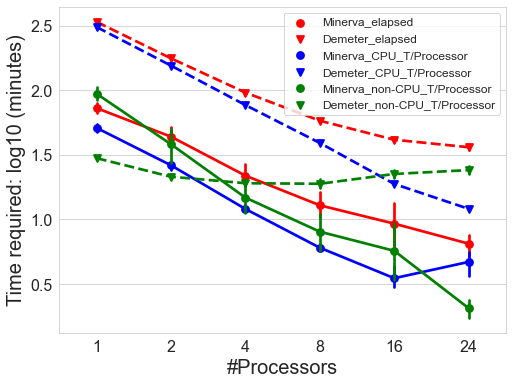

In [103]:
f1 = plt.figure(figsize=(8,6))
legend_label = ["Minerva_elapsed", "Demeter_elapsed",
                   "Minerva_CPU_T/Processor", "Demeter_CPU_T/Processor",
                   "Minerva_non-CPU_T/Processor", "Demeter_non-CPU_T/Processor"]

palette ={"Minerva_elapsed": "red",
          "Demeter_elapsed": "red",
          "Minerva_CPU_T/Processor": "blue",
           "Demeter_CPU_T/Processor": "blue",
          "Minerva_non-CPU_T/Processor": "green",
          "Demeter_non-CPU_T/Processor": "green"
         }

lss = ["-", "--", "-", "--", "-", "--"]
markers = ["o", "v","o", "v","o", "v"]
sns.pointplot(data=pf1, x="#processors", y="value", hue="legend_var",
              palette = palette, linestyles=lss, markers=markers, hue_order=legend_label)
plt.legend(fontsize=12, loc=1)
plt.xlabel("#Processors", fontsize=20)
plt.ylabel("Time required: log10 (minutes)", fontsize=20)
plt.tick_params(axis="both", labelsize=16)
plt.savefig("paper_figures/Figure2a_PF1_time.pdf", dpi=300, bbox_inches="tight")

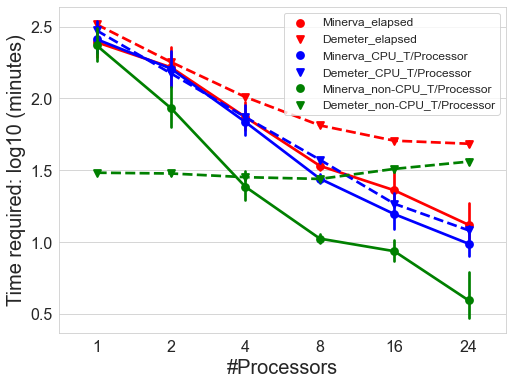

In [100]:
f1 = plt.figure(figsize=(8,6))
legend_label = ["Minerva_elapsed", "Demeter_elapsed",
                   "Minerva_CPU_T/Processor", "Demeter_CPU_T/Processor",
                   "Minerva_non-CPU_T/Processor", "Demeter_non-CPU_T/Processor"]

palette ={"Minerva_elapsed": "red",
          "Demeter_elapsed": "red",
          "Minerva_CPU_T/Processor": "blue",
           "Demeter_CPU_T/Processor": "blue",
          "Minerva_non-CPU_T/Processor": "green",
          "Demeter_non-CPU_T/Processor": "green"
         }

lss = ["-", "--", "-", "--", "-", "--"]
markers = ["o", "v","o", "v","o", "v"]
sns.pointplot(data=thaliana, x="#processors", y="value", hue="legend_var",
              palette = palette, linestyles=lss, markers=markers, hue_order=legend_label)
plt.legend(fontsize=12,loc=1)
plt.xlabel("#Processors", fontsize=20)
plt.ylabel("Time required: log10 (minutes)", fontsize=20)
plt.tick_params(axis="both", labelsize=16)
plt.savefig("paper_figures/Figure2b_thaliana_time.pdf", dpi=300, bbox_inches="tight")

In [101]:
# def plt_time(dn, ax):
#     minerva_df = minerva_data.loc[minerva_data.data == dn]
#     demeter_df = demeter_data.loc[demeter_data.data == dn]
#     #figure = plt.figure(figsize=(8,4))
#     sns.set_style('whitegrid')
#     # Elapsed
#     sns.pointplot(data=minerva_df,x='#processors',y='elapsed',linestyles='-',color='blue',legend=False, ax=ax) #Minerva
#     sns.pointplot(data=demeter_df,x='#processors',y='elapsed',linestyles='--',color='blue',legend=False, ax=ax)#Demeter
#     # CPU_T/Processor
#     sns.pointplot(data=minerva_df,x='#processors',y='CPU_T/Processor',linestyles='-',color='red',legend=False, ax=ax)
#     sns.pointplot(data=demeter_df,x='#processors',y='CPU_T/Processor',linestyles='--',color='red',legend=False, ax=ax)
#     # non-CPU_T/Processor
#     sns.pointplot(data=minerva_df,x='#processors',y='non-CPU_T/Processor',linestyles='-',color='green',legend=False, ax=ax)
#     sns.pointplot(data=demeter_df,x='#processors',y='non-CPU_T/Processor',linestyles='--',color='green',legend=False, ax=ax)

#     ax.tick_params(axis='both', which='major', labelsize=16)

#     ax.set_xlabel('#processors',fontsize=20)
#     ax.set_ylabel('time required (minutes)',fontsize=20)


In [102]:
# import matplotlib.backends.backend_pdf
# f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,6), sharey=True)

# plt_time("pf1", ax1)
# plt_time("thaliana", ax2)

# lines = [Line2D([0], [0],linewidth=2, linestyle='-', color= 'blue'),
#              Line2D([0], [0],linewidth=2, linestyle='--', color= 'blue'),
#                 Line2D([0], [0],linewidth=2, linestyle='-', color= 'red'),
#              Line2D([0], [0],linewidth=2, linestyle='--', color= 'red'),
#              Line2D([0], [0],linewidth=2, linestyle='-', color= 'green'),
#              Line2D([0], [0],linewidth=2, linestyle='--', color= 'green')]
    
# legend_label = ["Minerva elapsed", "Demeter elapsed",
#                    "Minerva CPU_T/Processor", "Demeter CPU_T/Processor",
#                    "Minerva non-CPU_T/Processor", "Demeter non-CPU_T/Processor"]
    
# plt.legend(lines,legend_label, loc=1, prop={'size': 12})
# plt.subplots_adjust(left=0, bottom=0, right=0.5, top=0.5, wspace=0.5, hspace=0.5)
# #pdf = matplotlib.backends.backend_pdf.PdfPages("final_results/computational_time.pdf")

# #for d in ['pf1','pf2','pf3','elegans','pacificus','remanei','drosophila','thaliana']:
# #    f = plt_time(d)
# #    pdf.savefig(f,bbox_inches='tight')
# #pdf.close()

In [6]:
# for d in ['pf1','pf2','pf3','elegans','pacificus','remanei','drosophila','thaliana']:
#     figd = plt_time(d)
#     plt.savefig('final_results/individual_data_time/%s_time.png' %d,bbox_inches='tight')